# Projeto 4: Teste A/B

## Francisco Ciol

### Introdução: 
   Desde a introdução da aviação comercial um medo comum é o  de acidentes aérios, considerando que é normalmente um acidente de grande proporção em um veículo que revolucionou a forma de transporte do ser humano. Apesar desse medo, viajar de avião é a forma mais segura de se locomover , com poucas chances de ocorrerem acidentes. Ainda assim ocorrem acidentes, que serão analisados em relação ao horário do acidente nas cidades de São Paulo e Rio de Janeiro já que os vôos dos aviões comerciais no país ocorrem principalmente nesses estados.

   Considerando os horários dos acidentes, podemos decidir se a rotina das duas metrópolis interferem nos horários dos acidentes.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib inline

In [2]:
dados = pd.read_csv('accidents.csv')

In [3]:
for i in range(0,len(dados.ocorrencia_horario),1):
    a = dados.ocorrencia_horario[i]
    asd = a.split(":")    
    hour = int(asd[0])*60
    minute = int(asd[1])
    second = int(asd[2])/60
    final = hour+minute+second
    dados.ocorrencia_horario[i] = final

C:\Users\frana\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
faixas = range(0,1440,24)
saopaulo = dados[(dados.ocorrencia_uf == "SP")]
riodejaneiro = dados[(dados.ocorrencia_uf == "RJ")]
faixas = range(0,1440,60)

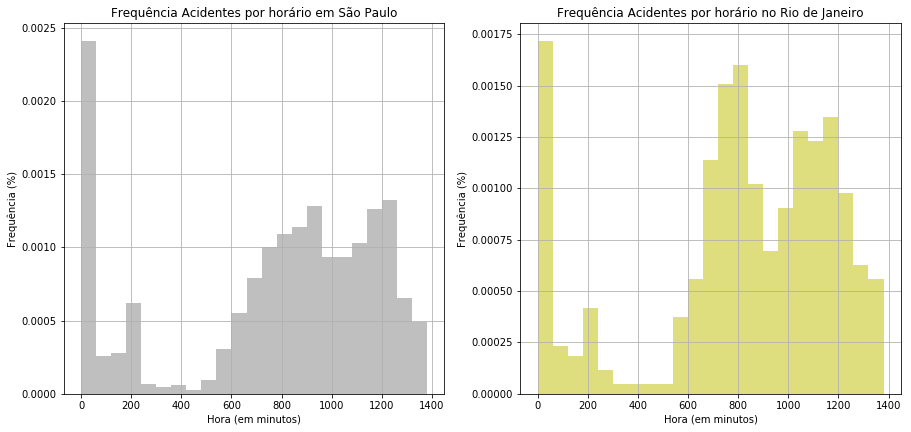

In [5]:
plt.figure(figsize=(15, 15))

plt.subplot(221)
saopaulo.ocorrencia_horario.plot(kind='hist',normed=True,color='grey',alpha=0.5,bins=faixas)
plt.title('Frequência Acidentes por horário em São Paulo')
plt.ylabel("Frequência (%)")
plt.xlabel("Hora (em minutos)")
plt.grid()

plt.subplot(222)
riodejaneiro.ocorrencia_horario.plot(kind='hist',normed=True,color='y',alpha=0.5,bins=faixas)
plt.title('Frequência Acidentes por horário no Rio de Janeiro')
plt.ylabel("Frequência (%)")
plt.xlabel("Hora (em minutos)")
plt.grid()

### Teste de Hipótese
Os acidentes de São Paulo e do Rio de Janeiro podem apresentar um comportamento parecido em relação á hora do ocorrido. Sabendo isso, a hipótese nula será de que a differênça entre as médias dos horários seja zero, assim sendo H1, hipótese alternativa, que a diferença seja diferente de zero.

In [6]:
dif_horas = []

n = 10000
for i in range(n):
    hsp = np.random.choice(saopaulo.ocorrencia_horario) 
    hrj = np.random.choice(riodejaneiro.ocorrencia_horario)
    hd = hsp - hrj
    dif_horas.append(hd)

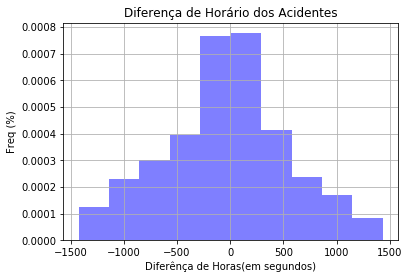

In [10]:
plt.hist(dif_horas, alpha=0.5, color='b', normed=True)
plt.title("Diferença de Horário dos Acidentes")
plt.xlabel("Diferênça de Horas(em segundos)")
plt.ylabel("Freq (%)")
plt.grid()

In [11]:
dmhobs = saopaulo.ocorrencia_horario.mean() - riodejaneiro.ocorrencia_horario.mean()
mdha= np.mean(dif_horas)
dpha = np.std(dif_horas)
z=(dmhobs - mdha)/(dpha)

print("Diferença das médias observadas:", dmhobs)
print("Média das Amostras:", mdha)
print("Desvio padrão amostral:",dpha)
print("Valor de z:", z)

Diferença das médias observadas: -35.188579882
Média das Amostras: -36.5758
Desvio padrão amostral: 578.142577964
Valor de z: 0.00239944292446


In [12]:
valor_p = stats.norm.sf(z)
print(1-valor_p)


0.500957238313


## Conclusão:

Após verificar os dados coletados, podemos concluir que o valor_p do sistema apresenta uma situação onde H0 não é rejeitada, para todo alpha de até 49.65%. Assim considero que não posso concluir nada da amostra pois ela tem praticamente a mesma chance de ocorrer um erro de tipo 1 ou de tipo 2 quanto de acertar na conclusão.